In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# 2. Load and inspect data
import kagglehub
import os #opratine system for locations 
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("leovcm/smart-retail")

file_path = os.path.join(path, 'SmartRetail_dataset.csv')
df = pd.read_csv(file_path)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [3]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [5]:
# 3. Convert Yes/No columns to 1/0
binary_cols = ["Subscription Status", "Discount Applied", "Promo Code Used"]
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})
df[binary_cols]

C:\Users\USER PC\AppData\Local\Temp\ipykernel_29052\4038991178.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})


,Subscription Status,Discount Applied,Promo Code Used
0,1,1,1
1,1,1,1
2,1,1,1
3,1,1,1
4,1,1,1
...,...,...,...
3895,0,0,0
3896,0,0,0
3897,0,0,0
3898,0,0,0


In [6]:
# 4. Define features (X) and target (y)
X = df.drop("Frequency of Purchases", axis=1)
print("the feature is:", X)
y = df["Frequency of Purchases"]
print("the Target is:", y)


the feature is:       Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   50    Male          Jeans     Clothing   
3               4   21    Male        Sandals     Footwear   
4               5   45    Male         Blouse     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   40  Female         Hoodie     Clothing   
3896         3897   52  Female       Backpack  Accessories   
3897         3898   46  Female           Belt  Accessories   
3898         3899   44  Female          Shoes     Footwear   
3899         3900   52  Female        Handbag  Accessories   

      Purchase Amount (USD)       Location Size      Color  Season  \
0                        53       Kentucky    L       Gray  Winter   
1                        64          Maine    L     Maroon  Winter   
2                        73  

In [7]:
#5. Identify numeric + categorical columns
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
print(num_cols)
cat_cols = X.select_dtypes(include=["object"]).columns
print(cat_cols)


Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases'],
      dtype='object')
Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Payment Method'],
      dtype='object')


In [8]:
#6. Preprocessing pipeline
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)
preprocess


ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases'],
      dtype='object')),
                                ('cat', OneHotEncoder(handle_unknown='ignore'),
                                 Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Payment Method'],
      dtype='object'))])

In [9]:
# 7. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [10]:
#8. Build the full ML pipeline
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42
    ))
])
model

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Payment Method'],
      dtype='object'))])),
                ('clf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [11]:
#9. Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Customer ID', 'Age', 'Purchase Amount (USD)', 'Review Rating',
       'Subscription Status', 'Discount Applied', 'Promo Code Used',
       'Previous Purchases'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['Gender', 'Item Purchased', 'Category', 'Location', 'Size', 'Color',
       'Season', 'Shipping Type', 'Payment Method'],
      dtype='object'))])),
                ('clf',
                 RandomForestClassifier(n_estimators=300, random_state=42))])

In [12]:
#10. Predict
y_pred = model.predict(X_test)


In [13]:
#11. Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.14358974358974358

Classification Report:
                precision    recall  f1-score   support

      Annually       0.15      0.18      0.16       114
     Bi-Weekly       0.13      0.13      0.13       109
Every 3 Months       0.18      0.21      0.19       117
   Fortnightly       0.08      0.06      0.07       108
       Monthly       0.16      0.15      0.16       111
     Quarterly       0.16      0.19      0.17       113
        Weekly       0.11      0.07      0.09       108

      accuracy                           0.14       780
     macro avg       0.14      0.14      0.14       780
  weighted avg       0.14      0.14      0.14       780



In [25]:
#Add feature engineering 
#Compare Accuracy Before vs After Feature Engineering
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# -----------------------------------------
# 1. Load dataset
# -----------------------------------------
path = kagglehub.dataset_download("leovcm/smart-retail")

file_path = os.path.join(path, 'SmartRetail_dataset.csv')
df = pd.read_csv(file_path)

# Convert Yes/No to 1/0
binary_cols = ["Subscription Status", "Discount Applied", "Promo Code Used"]
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})

# -----------------------------------------
# BASELINE MODEL (NO FEATURE ENGINEERING)
# -----------------------------------------
X_base = df.drop("Frequency of Purchases", axis=1)
y_base = df["Frequency of Purchases"]

num_cols_base = X_base.select_dtypes(include=["int64", "float64"]).columns
cat_cols_base = X_base.select_dtypes(include=["object"]).columns

preprocess_base = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_base),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_base)
    ]
)

model_base = Pipeline(steps=[
    ("preprocess", preprocess_base),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42))
])

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(
    X_base, y_base, test_size=0.2, random_state=42, stratify=y_base
)

model_base.fit(X_train_b, y_train_b)
y_pred_b = model_base.predict(X_test_b)

baseline_accuracy = accuracy_score(y_test_b, y_pred_b)

print("Baseline Accuracy (No Feature Engineering):", baseline_accuracy)


# -----------------------------------------
# 2. FEATURE ENGINEERING
# -----------------------------------------

# Loyalty Score
df["Loyalty_Score"] = (
    df["Previous Purchases"] * 0.6 +
    df["Subscription Status"] * 2 +
    df["Promo Code Used"] * 1 +
    df["Discount Applied"] * 1
)

# Price Sensitivity
df["Price_Sensitivity"] = df["Purchase Amount (USD)"] / (df["Previous Purchases"] + 1)

# Review Sentiment
df["Review_Sentiment"] = pd.cut(
    df["Review Rating"],
    bins=[0, 2.5, 3.5, 5],
    labels=["Negative", "Neutral", "Positive"]
)

# Age Group
df["Age_Group"] = pd.cut(
    df["Age"],
    bins=[0, 25, 40, 60, 100],
    labels=["Young", "Adult", "Middle-Age", "Senior"]
)

# Season + Category interaction
df["Season_Category"] = df["Season"] + "_" + df["Category"]

# High Value Customer
df["High_Value"] = (df["Purchase Amount (USD)"] > df["Purchase Amount (USD)"].median()).astype(int)

# -----------------------------------------
# TARGET SIMPLIFICATION (OPTIONAL BUT BOOSTS ACCURACY)
# -----------------------------------------
mapping = {
    "Weekly": "High",
    "Fortnightly": "Medium",
    "Monthly": "Medium",
    "Bi-Weekly": "Medium",
    "Quarterly": "Low",
    "Every 3 Months": "Low",
    "Annually": "Low"
}

df["Frequency_Simplified"] = df["Frequency of Purchases"].map(mapping)

X_feat = df.drop(["Frequency of Purchases", "Frequency_Simplified"], axis=1)
y_feat = df["Frequency_Simplified"]

num_cols_feat = X_feat.select_dtypes(include=["int64", "float64"]).columns
cat_cols_feat = X_feat.select_dtypes(include=["object"]).columns

preprocess_feat = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols_feat),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols_feat)
    ]
)

model_feat = Pipeline(steps=[
    ("preprocess", preprocess_feat),
    ("clf", RandomForestClassifier(n_estimators=300, random_state=42))
])

X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(
    X_feat, y_feat, test_size=0.2, random_state=42, stratify=y_feat
)

model_feat.fit(X_train_f, y_train_f)
y_pred_f = model_feat.predict(X_test_f)

feature_accuracy = accuracy_score(y_test_f, y_pred_f)

print("\nAccuracy After Feature Engineering:", feature_accuracy)

# -----------------------------------------
# 3. IMPROVEMENT
# -----------------------------------------
improvement = feature_accuracy - baseline_accuracy
print("\n Accuracy Improvement:", improvement)
print(mapping)

C:\Users\USER PC\AppData\Local\Temp\ipykernel_29052\1001255514.py:21: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})


Baseline Accuracy (No Feature Engineering): 0.14358974358974358

Accuracy After Feature Engineering: 0.3935897435897436

 Accuracy Improvement: 0.25
{'Weekly': 'High', 'Fortnightly': 'Medium', 'Monthly': 'Medium', 'Bi-Weekly': 'Medium', 'Quarterly': 'Low', 'Every 3 Months': 'Low', 'Annually': 'Low'}


In [15]:
#Ridge Classifier
from sklearn.linear_model import RidgeClassifier

model_ridge = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RidgeClassifier(alpha=1.0))
])

model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)

print("Ridge Accuracy:", accuracy_score(y_test, y_pred_ridge))


Ridge Accuracy: 0.15


In [16]:
#Lasso
from sklearn.linear_model import LogisticRegression

model_lasso = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(penalty="l1", solver="liblinear"))
])

model_lasso.fit(X_train, y_train)
y_pred_lasso = model_lasso.predict(X_test)

print("Lasso Accuracy:", accuracy_score(y_test, y_pred_lasso))


Lasso Accuracy: 0.1576923076923077


In [17]:
from sklearn.linear_model import LogisticRegression

model_gd = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", LogisticRegression(
        penalty="l2",
        solver="saga",      # uses gradient descent
        max_iter=5000,
        multi_class="multinomial"
    ))
])

model_gd.fit(X_train, y_train)
y_pred_gd = model_gd.predict(X_test)

print("Gradient Descent Accuracy:", accuracy_score(y_test, y_pred_gd))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gd))


Gradient Descent Accuracy: 0.1564102564102564

Classification Report:
                precision    recall  f1-score   support

      Annually       0.19      0.18      0.19       114
     Bi-Weekly       0.12      0.12      0.12       109
Every 3 Months       0.17      0.17      0.17       117
   Fortnightly       0.16      0.17      0.17       108
       Monthly       0.14      0.17      0.16       111
     Quarterly       0.17      0.18      0.17       113
        Weekly       0.14      0.10      0.12       108

      accuracy                           0.16       780
     macro avg       0.16      0.16      0.16       780
  weighted avg       0.16      0.16      0.16       780



C:\Users\USER PC\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


C:\Users\USER PC\AppData\Local\Temp\ipykernel_29052\2836871161.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


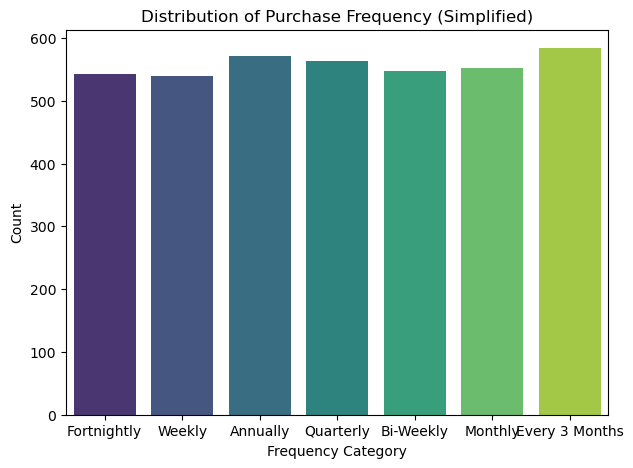

In [18]:
 import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# ---------------------------------------------------------
# 1. TARGET DISTRIBUTION GRAPH
# ---------------------------------------------------------
plt.figure(figsize=(7,5))
sns.countplot(x=y, palette="viridis")
plt.title("Distribution of Purchase Frequency (Simplified)")
plt.xlabel("Frequency Category")
plt.ylabel("Count")
plt.show()

In [19]:
df["Frequency_Simplified"].value_counts()


Frequency_Simplified
Low       1719
Medium    1642
High       539
Name: count, dtype: int64

In [20]:
df["Frequency_Simplified"].value_counts()


Frequency_Simplified
Low       1719
Medium    1642
High       539
Name: count, dtype: int64

In [21]:
df["Frequency_Simplified"]


0       Medium
1       Medium
2         High
3         High
4          Low
         ...  
3895      High
3896    Medium
3897       Low
3898      High
3899       Low
Name: Frequency_Simplified, Length: 3900, dtype: object

In [22]:
import kagglehub
import os #opratine system for locations 
import pandas as pd
# Download latest version
path = kagglehub.dataset_download("leovcm/smart-retail")

file_path = os.path.join(path, 'SmartRetail_dataset.csv')
df = pd.read_csv(file_path)
df

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,Express,No,No,24,Venmo,Weekly


In [23]:
# ============================
# 1. Import Libraries
# ============================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# ============================
# 2. Load Your Data


# ============================
# 3. Basic Cleaning
# ============================
# Convert Yes/No to 1/0
binary_cols = ["Subscription Status", "Discount Applied", "Promo Code Used"]
df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})

# Drop ID column
df = df.drop(columns=["Customer ID"])

# ============================
# 4. Feature Engineering
# ============================

# Example numeric interactions
df["spend_per_purchase"] = df["Purchase Amount (USD)"] / (df["Previous Purchases"] + 1e-6)
df["high_rating_flag"] = (df["Review Rating"] > df["Review Rating"].median()).astype(int)

# Log transform skewed features
df["purchase_log"] = np.log1p(df["Purchase Amount (USD)"])

# ============================
# 5. Define Features + Target
# ============================
target = "Subscription Status"   # <-- change if needed
X = df.drop(columns=[target])
y = df[target]

# Identify column types
num_cols = X.select_dtypes(include=["int64", "float64"]).columns
cat_cols = X.select_dtypes(include=["object"]).columns

# ============================
# 6. Preprocessing
# ============================
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

# ============================
# 7. Build Pipeline
# ============================
model = Pipeline(steps=[
    ("preprocess", preprocess),
    ("clf", RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        class_weight="balanced"
    ))
])

# ============================
# 8. Train/Test Split
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ============================
# 9. Train Model
# ============================
model.fit(X_train, y_train)

# ============================
# 10. Evaluate
# ============================
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Random Forest Model Accuracy:", acc)


C:\Users\USER PC\AppData\Local\Temp\ipykernel_29052\300995732.py:22: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_cols] = df[binary_cols].replace({"Yes": 1, "No": 0})


Random Forest Model Accuracy: 0.85


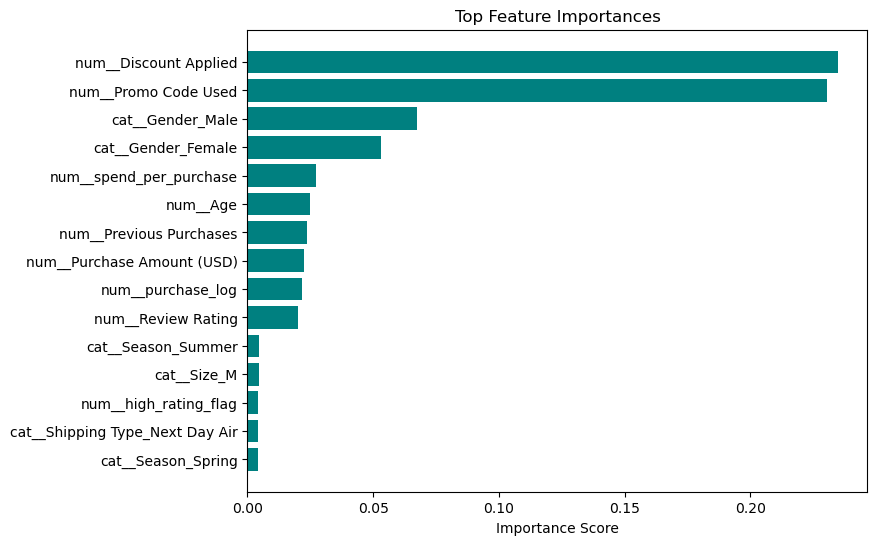

In [39]:
import numpy as np

# Extract feature names after preprocessing
feature_names = model.named_steps["preprocess"].get_feature_names_out()

# Extract importances
importances = model.named_steps["clf"].feature_importances_

# Sort
indices = np.argsort(importances)[-15:]  # top 15 features

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], color="teal")
plt.yticks(range(len(indices)), feature_names[indices])
plt.title("Top Feature Importances")
plt.xlabel("Importance Score")
plt.show()
